# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
list1 = []
def dice_func():
    list1.append(random.randint(1,6))
    
for _ in range(10):
    dice_func()
    
data = pd.DataFrame(list1)
data

,0
0,5
1,2
2,1
3,5
4,1
5,4
6,4
7,2
8,1
9,2


#### 2.- Plot the results sorted by value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127d6690>]],
      dtype=object)

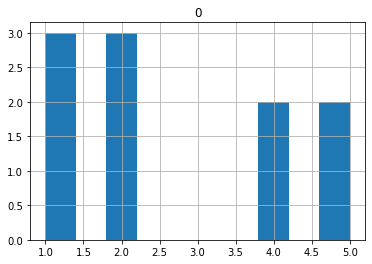

In [3]:
# your code here

data.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
# your code here
d = dict((x,list1.count(x)) for x in set(list1))
df = pd.DataFrame(d.items(), columns = ["Side","Occurrence"])
df

,Side,Occurrence
0,1,3
1,2,3
2,4,2
3,5,2


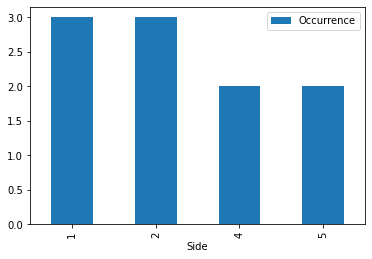

In [5]:
df.plot.bar(x="Side",y="Occurrence")
plt.show()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean(l):
    mean = sum(list1) / len(list1)
    return mean

mean(list1)


2.7

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
d = dict((x,list1.count(x)) for x in set(list1))
df = pd.DataFrame(d.items(), columns = ["Side","Occurrence"])
df["Mult"] = df.Side * df.Occurrence

mean = sum(df["Mult"]) / sum(df["Occurrence"])
mean

2.7

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here

def median_func(l):
    l = sorted(l)
    if len(l)%2 > 0:
        index = int((len(l)-1)/2)
        median = l[index]
        return median
    else:
        index1 = int(len(l)/2)
        index2 = int(index1-1)
        median = (l[index1] + l[index2])/2
        return median
    
median_func(list1)

2.0

In [9]:
statistics.median(list1)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
print(list1)

def quartiles_func(l):
    l = sorted(l)
    
    if len(l)%2 > 0:
        s = slice(0 , int((len(l)-1)/2))
    else:
        s = slice(0 , int((len(l)/2)))

    l1 = l[s]
    q1 = float(median_func(l1))
    
    q2 = median_func(l)
    
    if len(l)%2 > 0:
        initial = int(((len(l)-1)/2)+1)
    else:
        initial = int(len(l)/2)

    l2 = l[initial:]
    q3 = float(median_func(l2))
    
    return q1, q2, q3
    
quartiles_func(list1)

[5, 2, 1, 5, 1, 4, 4, 2, 1, 2]


(1.0, 2.0, 4.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [11]:
# your code here
df3 = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
df3 = df3.drop(['Unnamed: 0'],axis=1).set_index('roll')
df3.sort_values(by='value')

,value
roll,
0,1
47,1
56,1
9,1
73,1
...,...
17,6
11,6
24,6


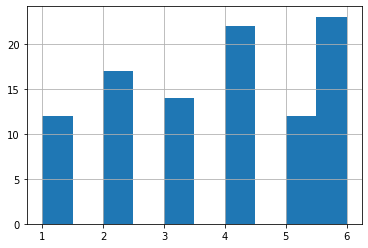

In [12]:
df3.value.hist()
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
def mean(l):
    mean = sum(l) / len(l)
    return mean

mean(list(df3.value))


3.74

#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here
list1 = list(df3.value)
d = dict((x,list1.count(x)) for x in set(list1))
freq = pd.DataFrame(d.items(), columns = ["Side","Occurrence"])

freq

,Side,Occurrence
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

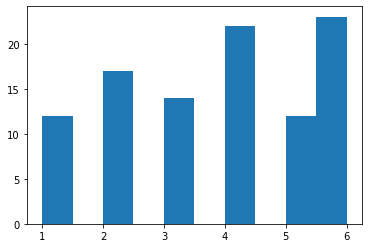

4.0


In [15]:
# your code here
plt.hist(df3.value)
plt.show()

print(np.median(df3.value))


In [16]:
"""
Since the mean is less than the median, we can assume (and see graphically) - that the histogram is skewed left since there are fewer rolls for the lower values of the dice. This drives the mean downward, but do not affect where the exact middle of the data is (median).
"""

'\nSince the mean is less than the median, we can assume (and see graphically) - that the histogram is skewed left since there are fewer rolls for the lower values of the dice. This drives the mean downward, but do not affect where the exact middle of the data is (median).\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

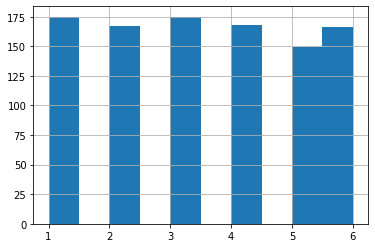

In [17]:
# your code here
df4 = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')
df4 = df4.drop(['Unnamed: 0'],axis=1).set_index('roll')
df4.sort_values(by='value')

df4.value.hist()
plt.show()

In [18]:
"""
Since the number of rolls increases to 1000, we are now seeing that 
the results of the experience are getting closer to the expected probability (1/6) -> law of large numbers.
"""

'\nSince the number of rolls increases to 1000, we are now seeing that \nthe results of the experience are getting closer to the expected probability (1/6) -> law of large numbers.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

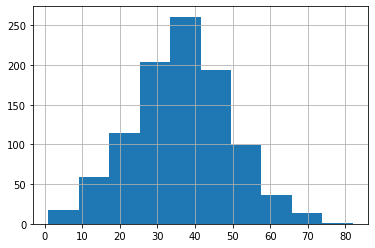

'\nMean around 39 \nMedian around the same value since the histogram is close to symmetric.\n'

In [19]:
# your code here

pop1 = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-understanding-descriptive-stats/data/ages_population.csv')
pop1

pop1.observation.hist()
plt.show()

"""
Mean around 39 
Median around the same value since the histogram is close to symmetric.
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
# your code here
mean = np.mean(pop1.observation)
median = np.median(pop1.observation)

mean, median


(36.56, 37.0)

In [21]:
"""
Values are a bit lower than guessed previously.
"""

'\nValues are a bit lower than guessed previously.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

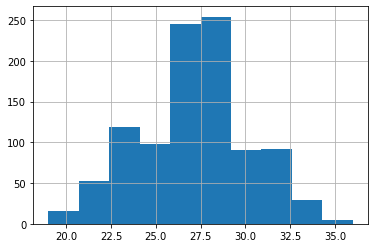

In [22]:
# your code here
pop2 = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-understanding-descriptive-stats/data/ages_population2.csv')
pop2

pop2.observation.hist()
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
Yes, this distribution is much more concentrated in the middle values.
"""

'\nYes, this distribution is much more concentrated in the middle values.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
# your code here
mean = np.mean(pop2.observation)
median = np.median(pop2.observation)

mean, median



(27.155, 27.0)

In [25]:
"""
Although median and mean of distribution are similar (but lower than previous example), this distribution presents a very high frequency in the middle 
values.
"""

'\nAlthough median and mean of distribution are similar (but lower than previous example), this distribution presents a very high frequency in the middle \nvalues.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

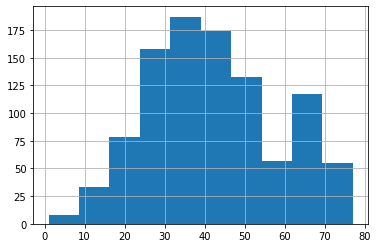

In [26]:
# your code here
pop3 = pd.read_csv(r'/Users/telmabatista/Documents/Ironhack/Labs/lab-understanding-descriptive-stats/data/ages_population3.csv')
pop3

pop3.observation.hist()
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
# your code here
mean = np.mean(pop3.observation)
median = np.median(pop3.observation)

mean, median

(41.989, 40.0)

In [28]:
"""
Histogram is skewed to the left.
"""

'\nHistogram is skewed to the left.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [36]:
# your code here
pop3["observation"].quantile([0.25,0.5,0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [30]:
"""
The quartiles support the positive skew, with the longer rigth tail and the mass of the distributiom is 
concentrated on the left.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [39]:
# your code here
pop3["observation"].quantile([0.125,0.25,0.375,0.5,0.625,0.75,0.875])

0.125    24.0
0.250    30.0
0.375    35.0
0.500    40.0
0.625    46.0
0.750    53.0
0.875    66.0
Name: observation, dtype: float64

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'